<a href="https://colab.research.google.com/github/heyjyoti4u/Stock_Market_Analysis/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data Loaded Successfully!
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  

Missing Values:
 Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data Summary:
                                Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212

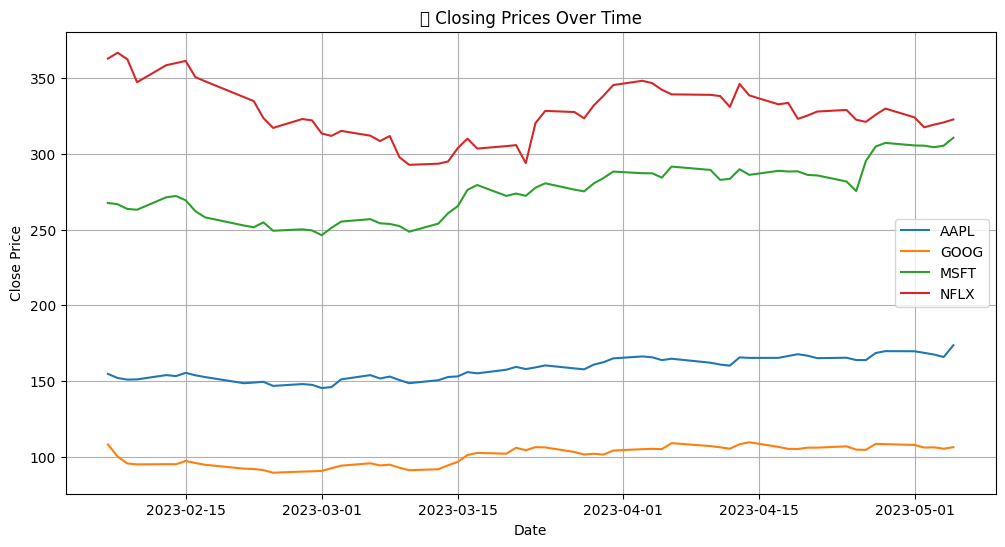

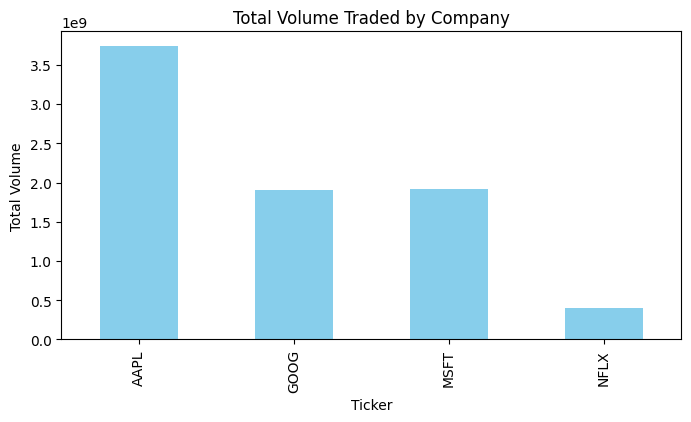

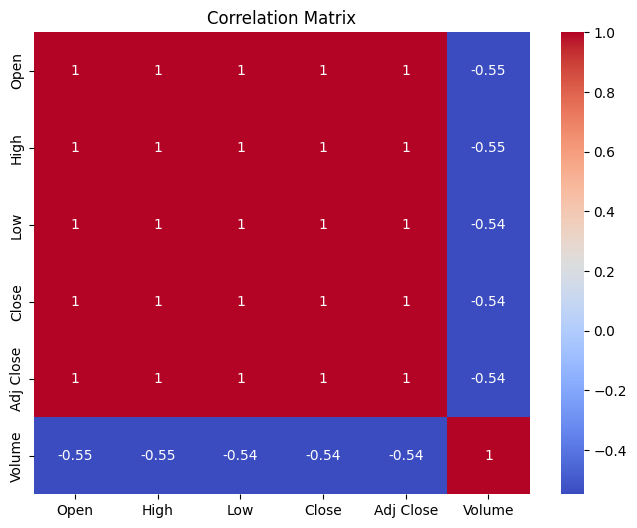

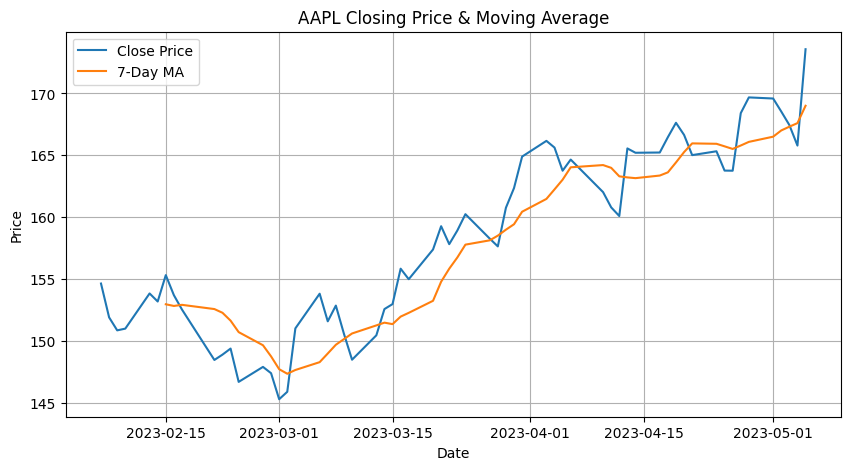

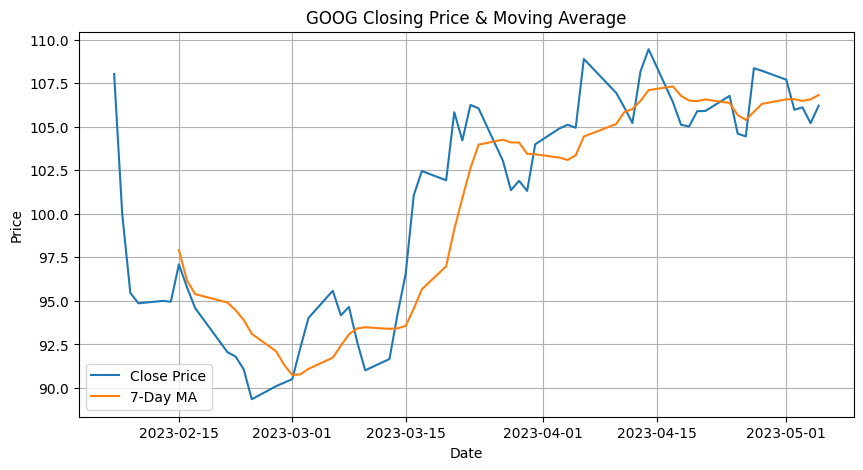

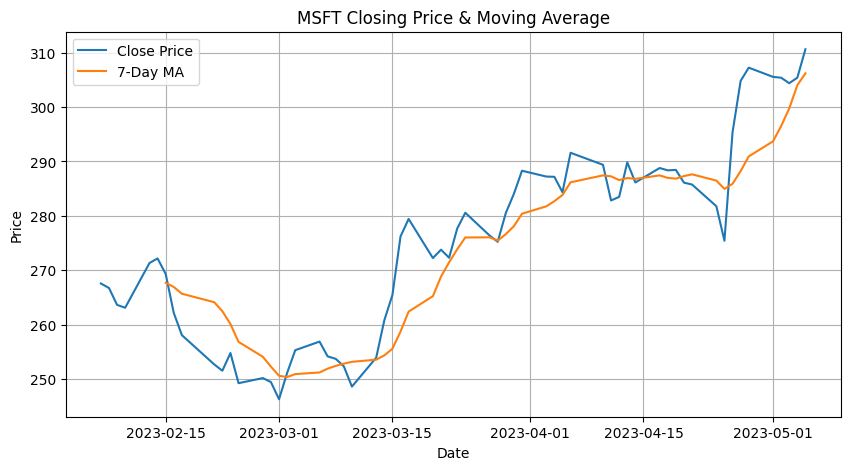

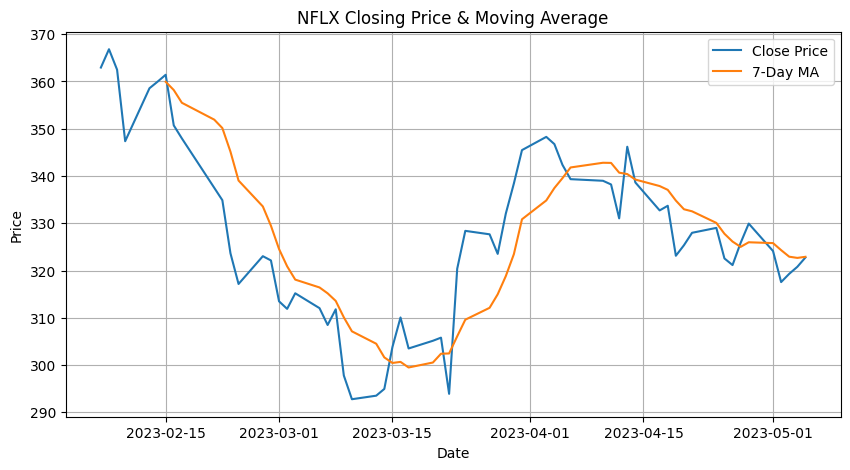


📊 Model Performance on AAPL:
R² Score: 0.9854542039450385
RMSE: 1.0436765521533131


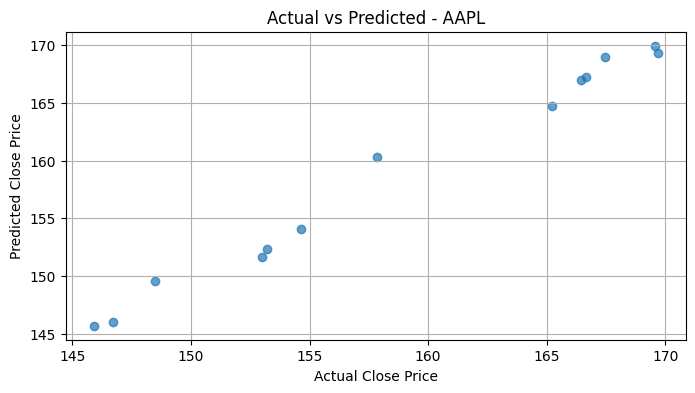


✅ Analysis Complete. You now have:
- Trends for each stock
- Volume insights
- Moving averages and volatility
- Simple ML model predictions


In [2]:
# 📌 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 🔧 Optional: Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 📌 2. Load the Dataset
data = pd.read_csv('stocks.csv')  # Make sure 'stocks.csv' is in the same directory
print("✅ Data Loaded Successfully!")
print(data.head())

# 📌 3. Preprocess & Clean
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by=['Ticker', 'Date'])

# Check for nulls
print("\nMissing Values:\n", data.isnull().sum())

# 📌 4. Exploratory Data Analysis (EDA)
print("\nData Summary:")
print(data.describe())

# Unique companies
print("\nTickers:", data['Ticker'].unique())

# Lineplot of Closing Price per Ticker
plt.figure(figsize=(12, 6))
for ticker in data['Ticker'].unique():
    subset = data[data['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)
plt.title("📈 Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# 📌 5. Volume Analysis
plt.figure(figsize=(8, 4))
ticker_volume = data.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar', color='skyblue')
plt.title('Total Volume Traded by Company')
plt.ylabel('Total Volume')
plt.show()

# 📌 6. Correlation Analysis
numeric_data = data.drop(['Ticker', 'Date'], axis=1)
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 📌 7. Moving Average & Volatility
for ticker in data['Ticker'].unique():
    subset = data[data['Ticker'] == ticker].copy()
    subset['MA_7'] = subset['Close'].rolling(window=7).mean()
    subset['Volatility'] = subset['Close'].rolling(window=7).std()

    plt.figure(figsize=(10, 5))
    plt.plot(subset['Date'], subset['Close'], label='Close Price')
    plt.plot(subset['Date'], subset['MA_7'], label='7-Day MA')
    plt.title(f'{ticker} Closing Price & Moving Average')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# 📌 8. Simple Predictive Model (Optional)
# Let's predict AAPL's closing price from Open, High, Low, Volume
aapl = data[data['Ticker'] == 'AAPL'].copy()
X = aapl[['Open', 'High', 'Low', 'Volume']]
y = aapl['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\n📊 Model Performance on AAPL:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Actual vs Predicted
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted - AAPL")
plt.grid(True)
plt.show()

# 📌 9. Conclusion
print("\n✅ Analysis Complete. You now have:")
print("- Trends for each stock")
print("- Volume insights")
print("- Moving averages and volatility")
print("- Simple ML model predictions")
